<a href="https://colab.research.google.com/github/PrathameshP26/DNN/blob/main/AlexNet_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

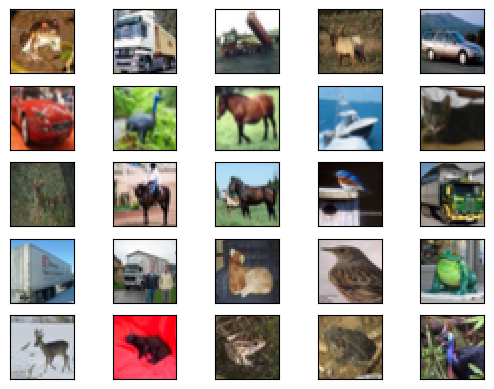

In [5]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])

In [6]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [7]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [8]:
def process_img(image,label):
  image=tf.image.per_image_standardization(image)
  image=tf.image.resize(image,(64,64))
  return image,label

In [9]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('train size',train_ds_size)
print('test size',test_ds_size)

train size 50000
test size 10000


In [10]:
train_ds=(train_ds.map(process_img).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))
test_ds=(test_ds.map(process_img).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))


In [11]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(32, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>

In [12]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [13]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds,epochs=30,validation_data=test_ds)

Epoch 1/30
 490/1562 [========>.....................] - ETA: 7:06 - loss: 2.4754 - accuracy: 0.1800